## Process for getting the data

In [1]:
#1- first we get the data from the sklearn
#2- Extract all the data of newsgroups
#2- split the data in training data and testing data in ratio of 3:1
#3- Makes the dictionary of total words and their frequency
#4- Plot the graph and see up to which words we can take 
#5- Take that much word and make them into 2d array
#6- In 2D array for every document store the word frequency 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import re,string
import matplotlib.pyplot as plt

In [3]:
data = fetch_20newsgroups()
## Here we have total 20 targets 
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Defining all the categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

news =   fetch_20newsgroups(subset = 'all',categories = categories)
## here we use the all so that we get the all data and split it according to us.
print(len(news.target))

18846


In [5]:
x_train,x_test,y_train,y_test = train_test_split(news.data,news.target,test_size = 0.25)
print(len(x_train))
print(len(x_test))


14134
4712


In [6]:

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [7]:
#This are stop_words in common taken from intenet.
## Since according to these words we are not going to get any money
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [8]:
## Here we are going to store the frequency of every word
dic= {}
for i in range(len(x_train)):
    ## We are going to take the first document
    string = x_train[i].lower()
    ## split it around the many points into differnt word
    word = re.split(r'\W+',string)
    ## Now go on every word and see that it's come or not
    for s in word:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s] += 1
        else:
            dic[s] = 1
dic

{'slegge': 14,
 'kean': 24,
 'ucs': 363,
 'mun': 31,
 'subject': 15253,
 'nhl': 407,
 'team': 1290,
 'captains': 27,
 'lines': 14750,
 'organization': 14031,
 'memorial': 73,
 'university': 7003,
 'john': 1702,
 'nfld': 7,
 'canada': 885,
 'captain': 115,
 'trivia': 49,
 'next': 1272,
 'edmonton': 160,
 'catain': 1,
 'lee': 349,
 'fogilin': 1,
 'later': 757,
 'traded': 118,
 'buffalo': 507,
 'sabres': 117,
 'wayne': 264,
 'gretzky': 76,
 'came': 974,
 'kevin': 296,
 'low': 807,
 'nly': 5,
 'year': 2292,
 'rangers': 214,
 'wasn': 560,
 'mark': 1326,
 'messier': 37,
 'oilers': 80,
 'lowe': 12,
 'course': 1530,
 'well': 4329,
 'point': 2297,
 'every': 1673,
 'still': 2524,
 'true': 1624,
 'stephen': 345,
 'legge': 7,
 'ameline': 5,
 'vnet': 138,
 'ibm': 1316,
 'com': 14959,
 'ian': 86,
 'facinating': 8,
 'facts': 304,
 'bit': 1937,
 'serial': 479,
 'number': 2098,
 'possibly': 324,
 'fixed': 189,
 'set': 1517,
 'development': 488,
 'lab': 384,
 'disclaimer': 563,
 'posting': 6819,
 'repre

### sort the dictionary according to the frequency of words and we are going
## to take the top 2000 words from it
from operator import itemgetter
sorted_dic = sorted(dic.items(),key = itemgetter(1),reverse = True)
sorted_dic


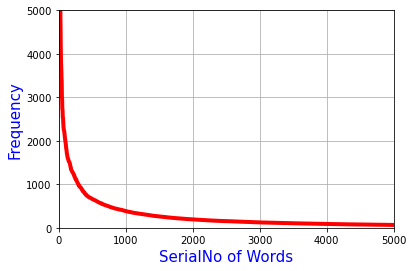

In [10]:
## Let's plot the no of word vs frequncy
no_of_word = []
frequency = []
freq = 0
for i in range(len(sorted_dic)):
    no_of_word.append(i+1)
    frequency.append( sorted_dic[i][1])
plt.plot(no_of_word,frequency,linewidth = 4,color = 'r')
plt.axis([0,5000,0,5000])
plt.xlabel('SerialNo of Words',fontsize =  15,color = 'b')
plt.ylabel('Frequency',fontsize = 15,color = 'b')
plt.grid()
plt.show()
## From this graph we see that there is no any need of using more than 2000 data
## for our prediction becuase we can see that the value of freq of decreases 
## So they doesn't much more impact our prediction

In [11]:
## Let's extract the feature's name which is the 
## name of words in this case of the first 2000 words
features = [sorted_dic[i][0] for i in range(2000)]
features

['edu',
 'not',
 'subject',
 'com',
 'lines',
 'can',
 'organization',
 'will',
 'one',
 'writes',
 'article',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'know',
 'host',
 'get',
 'nntp',
 'think',
 'also',
 'time',
 'use',
 'new',
 'max',
 'good',
 'well',
 'may',
 'even',
 'now',
 'see',
 'god',
 'way',
 'two',
 'much',
 'make',
 'first',
 'many',
 'world',
 'say',
 'distribution',
 'system',
 'right',
 'anyone',
 'want',
 'said',
 'used',
 'need',
 'reply',
 'state',
 'work',
 'really',
 'something',
 'problem',
 'computer',
 'please',
 'since',
 'back',
 'off',
 'believe',
 'mail',
 'still',
 'file',
 'going',
 'windows',
 'find',
 'help',
 'information',
 'government',
 'point',
 'take',
 'year',
 'might',
 'using',
 'question',
 'last',
 'years',
 'usa',
 'never',
 'things',
 'news',
 'better',
 'software',
 'thanks',
 'read',
 'must',
 'without',
 'etc',
 'number',
 'david',
 'sure',
 'another',
 'case',
 'drive',
 'someone',
 'made',
 'program',
 'space',


In [12]:
## Now we are going to make the 2D array which consists of 
## word as fetures in it and their frequency in each document
x_train_datasets = np.zeros([len(x_train),len(features)],int)
## iterating through the every documents
for i in range(len(x_train)):
    string = x_train[i].lower()
    words = re.split(r'\W+',string)
    ## iterating through every words of that documents
    for s in words:
        ## we check that words in features if it's present then increment the count
        if s in features:
            x_train_datasets[i][features.index(s)] += 1
            

In [13]:
## Let's do the same operation what we do above in the case of test data
x_test_datasets = np.zeros([len(x_test),len(features)],int)
## iterating through every documents
for i in range(len(x_test)):
    string = x_test[i].lower()
    words = re.split(r'\W+',string)
    for s in words:
        if s in features:
            x_test_datasets[i][features.index(s)] += 1

In [14]:
print("type of all require things with their shapes: ")
print(type(x_train_datasets),x_train_datasets.shape)
print(type(y_train),y_train.shape)
print(type(x_test_datasets),x_test_datasets.shape)
print(type(y_test),y_test.shape)

type of all require things with their shapes: 
<class 'numpy.ndarray'> (14134, 2000)
<class 'numpy.ndarray'> (14134,)
<class 'numpy.ndarray'> (4712, 2000)
<class 'numpy.ndarray'> (4712,)


## Analysis by using the inbuilt  Mulitnomial naiva bayes


In [43]:
clf = MultinomialNB()
clf.fit(x_train_datasets,y_train)
y_pred = clf.predict(x_test_datasets)
print(classification_report(y_test,y_pred,target_names = categories))
print(confusion_matrix(y_test,y_pred))
print('score of training data: ',clf.score(x_train_datasets,y_train))
print('score of testing data: ',clf.score(x_test_datasets,y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.80      0.80       202
           comp.graphics       0.62      0.55      0.58       238
 comp.os.ms-windows.misc       0.76      0.57      0.65       249
comp.sys.ibm.pc.hardware       0.65      0.62      0.64       260
   comp.sys.mac.hardware       0.60      0.74      0.66       227
          comp.windows.x       0.74      0.78      0.76       254
            misc.forsale       0.65      0.83      0.73       236
               rec.autos       0.76      0.84      0.80       259
         rec.motorcycles       0.73      0.88      0.80       229
      rec.sport.baseball       0.86      0.86      0.86       268
        rec.sport.hockey       0.88      0.90      0.89       269
               sci.crypt       0.93      0.83      0.88       266
         sci.electronics       0.67      0.67      0.67       256
                 sci.med       0.87      0.79      0.83       247
         

## Self Implementation of naive bayes

In [16]:
## let's first define the fit function which takes the x_train
## and y_train as input and give the output as the dictionary which 
## contain all the necessary counts needed for finding the probabilies
## We need following counts for finding the probabilities:
## 1-For finding the probabilities that it's belongs to class i
##     a- Total no of documents belongs to that particular class(x_current.shape[0])
##     b- total no of documents (x_train.shape[0])
## 2-finding the probabilities that words belongs to that particular class
##     a-Total freq of that particular belongs to that particular class
##     b- Total no of words in that class


In [44]:
def fit(x_train,y_train):
    ## result is dictionary which store all the count
    result = {}
    ## total no of classes
    classes = set(y_train)
    ## total no of document
    result['total_doc'] = y_train.shape[0]
    ## iterate through the all classes
    for cur_class in classes:
        result[cur_class] = {}
        ##cls_word is used for storing total no of words in that class
        result[cur_class]['cls_word'] = 0
        ##total data belongs to that cur_class
        x_curr = x_train[y_train == cur_class]
        ##cls_doc is used for finding the document for that class
        result[cur_class]['cls_doc'] = x_curr.shape[0]
        ##finding the all the featueres
        num_features = x_train.shape[1]
        ##iterate through all the features 
        for j in range(num_features):
            result[cur_class][j] = (x_curr[:,j]).sum()
            result[cur_class]['cls_word'] += result[cur_class][j]
    return result

In [49]:
## this function takes the one row of our data and do the 
## prediction on that data by going through it's all the features
def probability(x,curr_class,dictionary):
    ##probabilities of finding the particular class
    prob = np.log(dictionary[curr_class]['cls_doc']) - np.log(dictionary['total_doc'])
    num_features = len(dictionary[curr_class].keys()) - 2
    for j in range(num_features):
        xj = x[j];
        if xj == 0:
            prob += 0
        else:
            ##We add extra one in numerator for doing the laplace correction
            num = dictionary[curr_class][j] + 1
            ## We add the num of features in denominator for doing the sum = 1
            den = dictionary[curr_class]['cls_word'] + num_features
            prob = prob + (np.log(num) - np.log(den))
    return prob

In [46]:
## this function takes single point and gives us the best class
## which gives the highest probabilities
def SinglePointPrediction(x,dictionary):
    ## we take this value for first time
    firstTrue = True
    best_class = -1
    best_prob = -1000
    ## total key in classes
    classes = dictionary.keys()
    ## iterate through every class(20)
    for cur_class in classes:
        if cur_class == 'total_doc':
            continue
        cur_prob = probability(x,cur_class,dictionary)
        if firstTrue or cur_prob > best_prob:
            best_prob = cur_prob
            best_class = cur_class
            firstTrue = False
    return best_class

In [47]:
## Prediction function which take testing data and gives the y_pred as output
def predict(x_test,dictionary):
    y_pred = []
    ##go through every row of testing data
    for x in x_test:
        ##gives the prediction on single row
        x_class = SinglePointPrediction(x,dictionary)
        y_pred.append(x_class)
    return y_pred

In [50]:
## call the function
dictionary = fit(x_train_datasets,y_train)
y_pred = predict(x_test_datasets,dictionary)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       202
           1       0.61      0.55      0.58       238
           2       0.78      0.47      0.59       249
           3       0.63      0.64      0.63       260
           4       0.58      0.74      0.66       227
           5       0.75      0.76      0.75       254
           6       0.66      0.85      0.74       236
           7       0.74      0.82      0.78       259
           8       0.75      0.89      0.81       229
           9       0.86      0.87      0.87       268
          10       0.92      0.89      0.90       269
          11       0.95      0.86      0.90       266
          12       0.62      0.70      0.65       256
          13       0.86      0.80      0.83       247
          14       0.86      0.89      0.88       238
          15       0.91      0.84      0.87       256
          16       0.72      0.89      0.79       195
          17       0.94    

So from both the method (inbuilt and self implementation) observe that the accurracy is almost same in both of the cases.